In [2]:
import pickle
import plotnine as pn
import patchworklib as pw
import partipy as pt
import scanpy as sc
import matplotlib.pyplot as plt

<Figure size 100x100 with 0 Axes>

## Fig 4

In [2]:
adata = sc.read_h5ad( "DataAnalysis/adata_ncMRun.h5ad")

In [3]:
p1 = pt.plot_bootstrap_2D(adata, n_archetypes=4, alpha = 0.5, show_two_panels=True) + pn.theme_matplotlib()
p1 = pw.load_ggplot(p1, figsize=(14, 5))
p1.set_index("B", fontsize = 20)

Text(-0.0305698528788497, 1.0210282601572738, 'B')

<Figure size 640x480 with 0 Axes>

In [4]:
p2 = pt.plot_archetypes_2D(adata=adata, show_two_panels=True, alpha=0.5, size = 0.5) + pn.theme_matplotlib()
p2 = pw.load_ggplot(p2, figsize=(14, 5))
p2.set_index("C", fontsize = 20)

Text(-0.031323312407773314, 1.0210282601572738, 'C')

<Figure size 640x480 with 0 Axes>

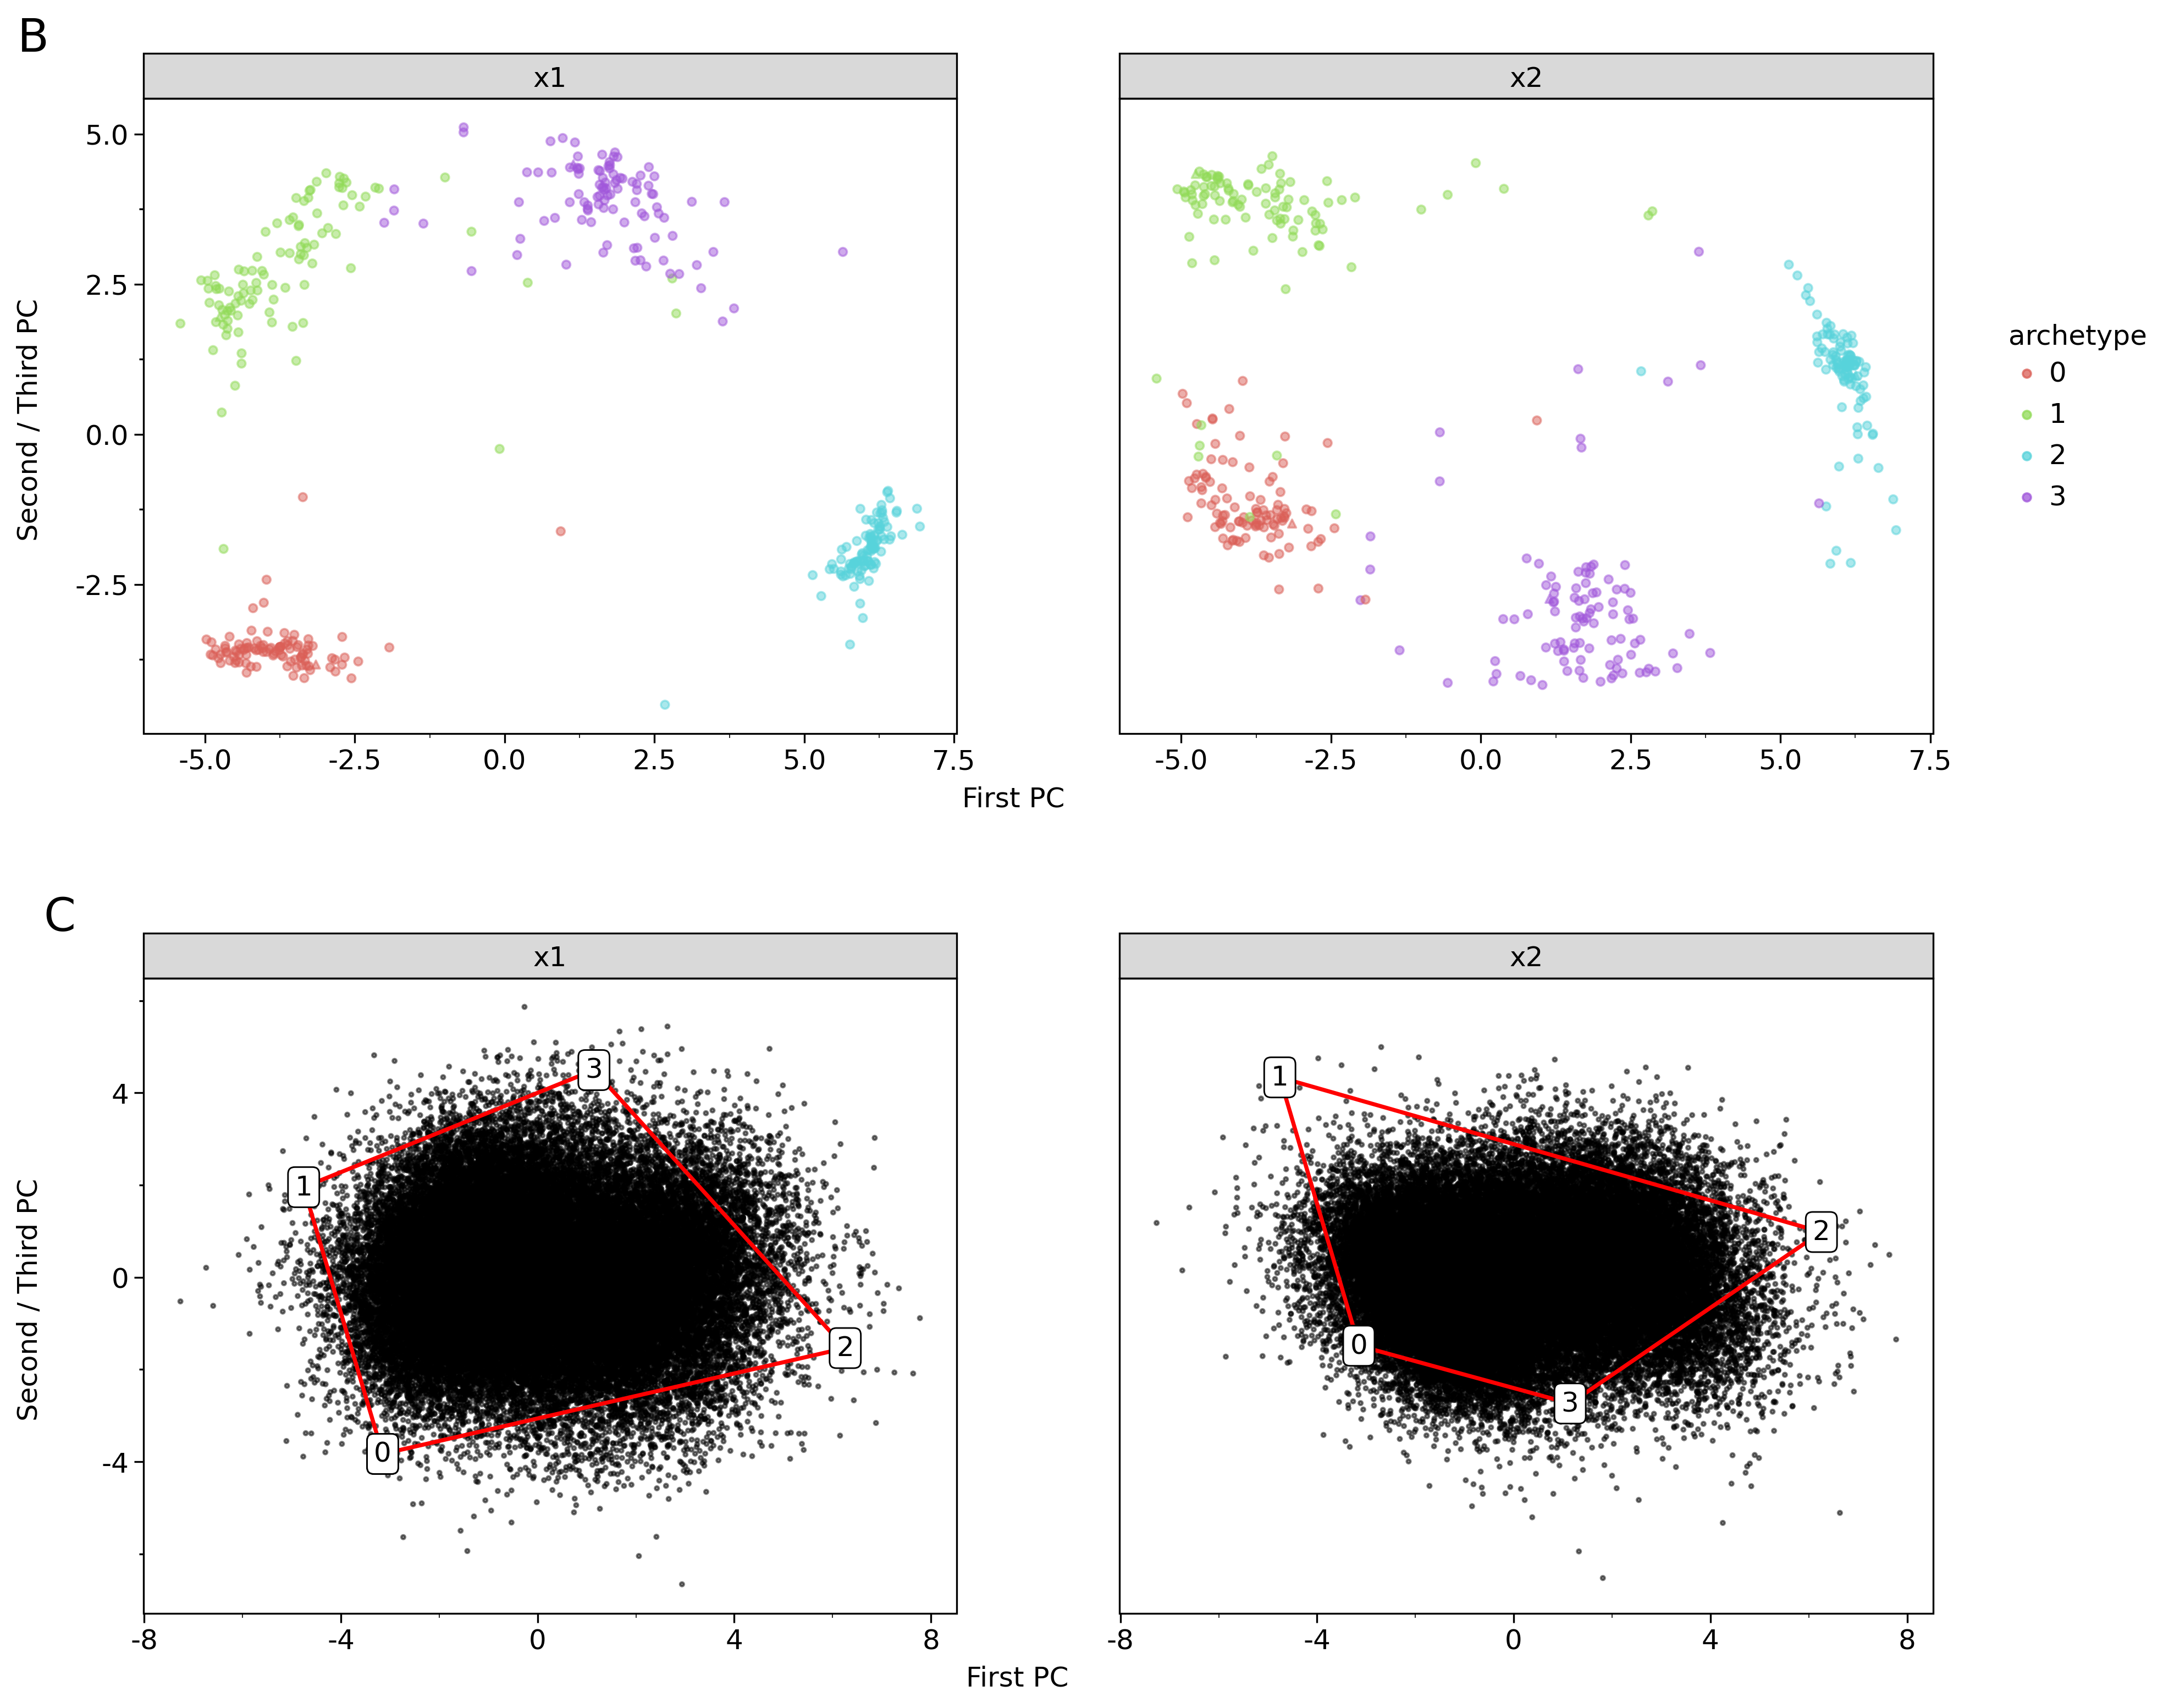

In [5]:
all_p = (p1/p2)
all_p.align_ylabels()
all_p

## FIg 5 upper part

In [2]:
adata = sc.read_h5ad( "DataAnalysis/adata_ncMRun.h5ad")
status_enrichment = pt.compute_meta_enrichment(adata=adata, meta_col="Status")

In [3]:
p0 = pt.barplot_meta_enrichment(status_enrichment, meta="Status")
p0 = pw.load_ggplot(p0)
p0.set_index("A", fontsize = 30)

Text(-0.0, 1.0284360189573458, 'A')

<Figure size 640x480 with 0 Axes>

In [4]:
p3 = pt.plot_archetypes_2D(adata=adata,  color="flare_status", size = 0.5, alpha = 0.5) + pn.theme_matplotlib() + pn.scale_color_manual(values=adata.uns["flare_status_colors"])
p3 = pw.load_ggplot(p3)
p3.set_index("B", fontsize = 30)

Text(-0.0, 1.0, 'B')

<Figure size 640x480 with 0 Axes>

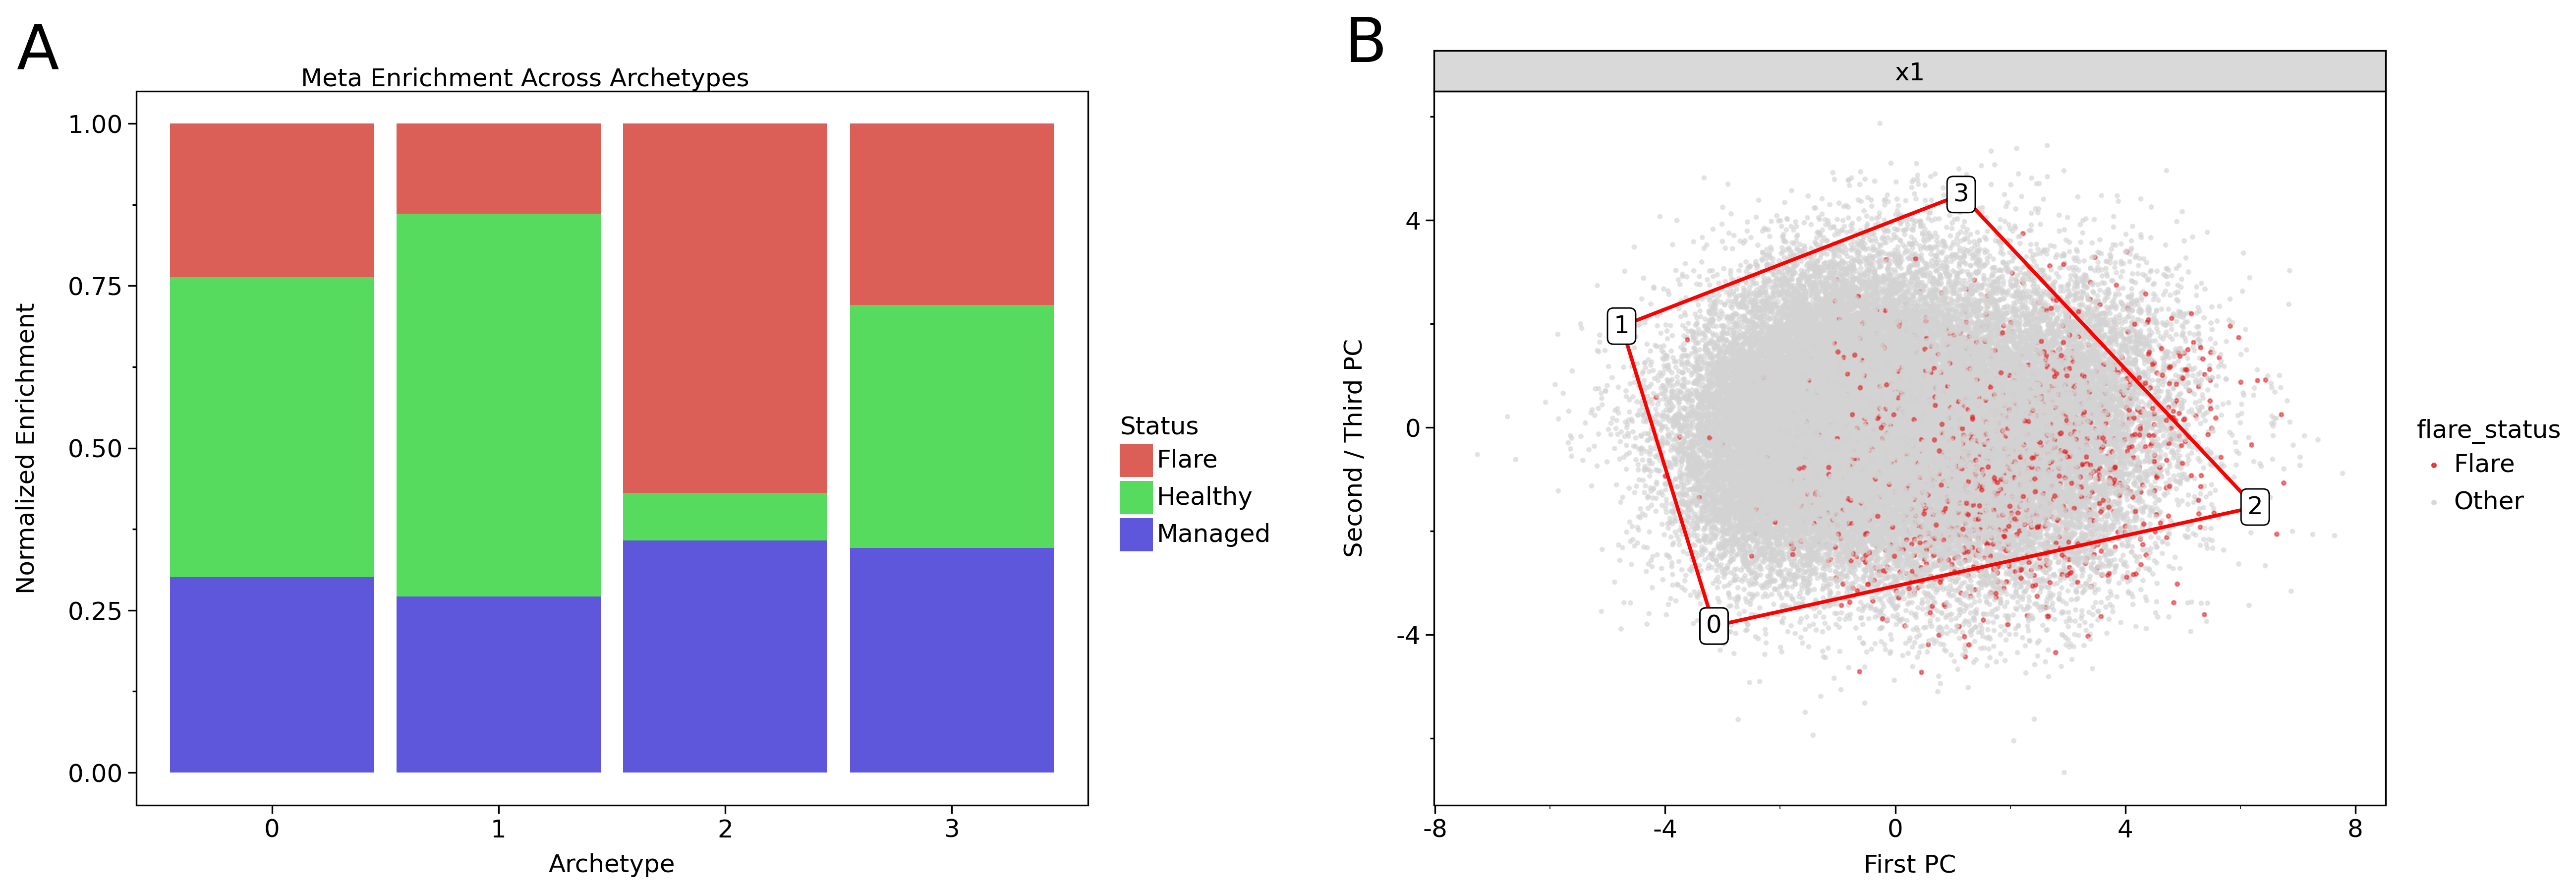

In [5]:
all_p = p0|p3
all_p

## Fig 5


In [3]:
with open('Plots/specific_processes_ncM.pkl', 'rb') as f:
    specific_processes = pickle.load(f)

In [4]:
theme_text = pn.theme(
    plot_title=pn.element_text(size=20, weight='bold'),
    axis_title=pn.element_text(size=18),
    axis_text=pn.element_text(size=18),
    legend_title=pn.element_text(size=18),
    legend_text=pn.element_text(size=16),
    strip_text=pn.element_text(size=15)
)

In [5]:
p1 = pt.barplot_enrichment_comparison(specific_processes[1]) + pn.ggtitle("Specific Enrichment at Archetype 1")+theme_text
p1 = pw.load_ggplot(p1)
p1.set_index("C", fontsize = 40)
p2 = pt.barplot_enrichment_comparison(specific_processes[2]) + pn.ggtitle("Specific Enrichment at Archetype 2") +theme_text
p2 = pw.load_ggplot(p2)
p2.set_index("D", fontsize = 40)


Text(-0.0, 1.049572145175568, 'D')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

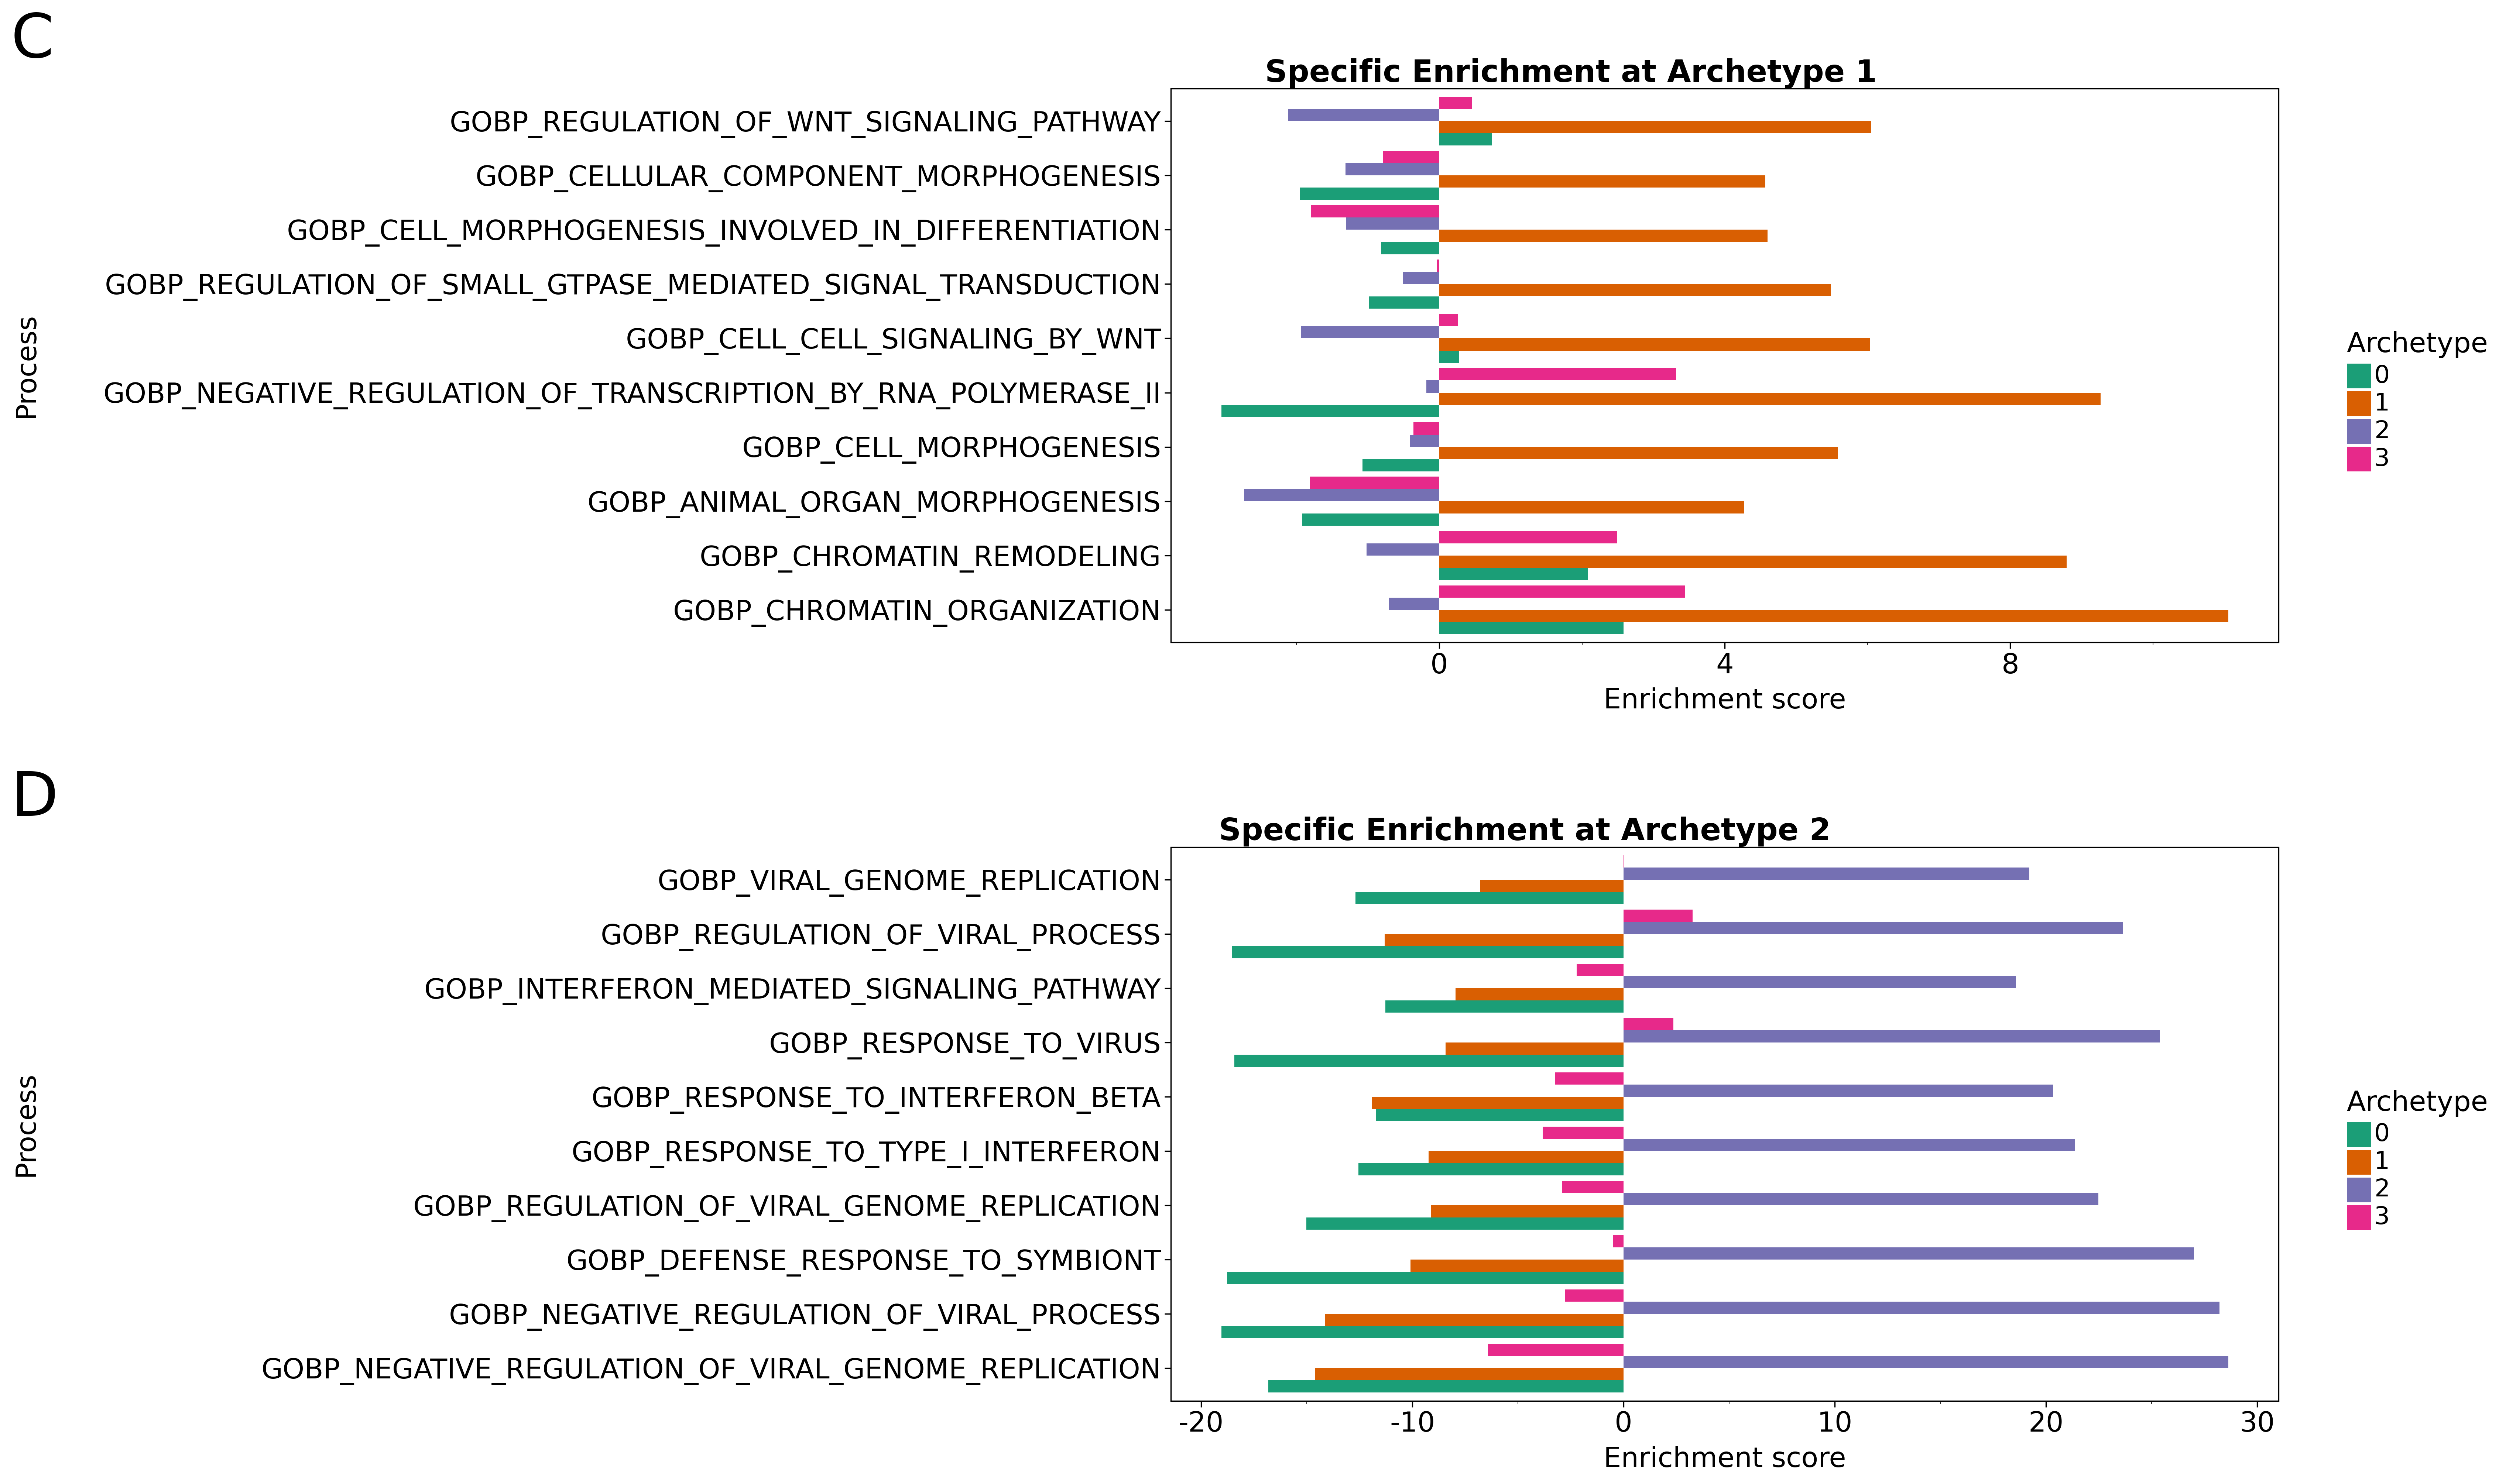

In [6]:
all_p = (p1/p2)
all_p.align_ylabels()
all_p

## Supp 1

In [2]:
adata = sc.read_h5ad( "DataAnalysis/adata_ncMRun.h5ad")

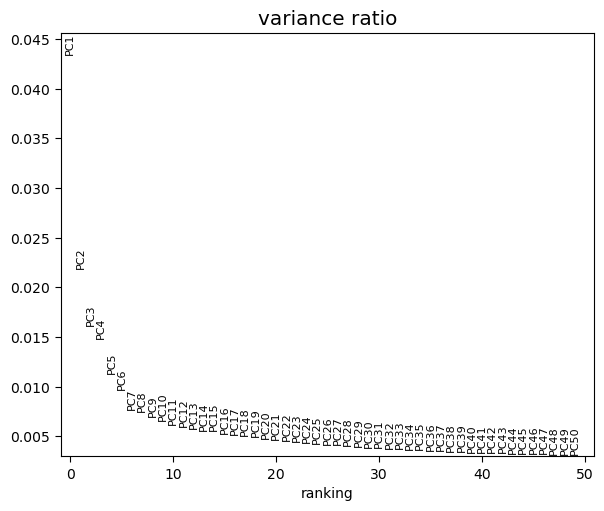

In [3]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, show=False)

fig = plt.gcf()
fig.set_size_inches(6.75, 5.5)


ax = plt.gca()
ax.tick_params(axis='both', labelsize=10)  
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=10)

plt.tight_layout()
plt.show()

In [4]:
p0= pt.plot_var_explained(adata)+ pn.theme_matplotlib()
p0 = pw.load_ggplot(p0)
p0.set_index("A", fontsize = 40)


p1= pt.plot_var_explained(adata)+ pn.theme_matplotlib()
p1 = pw.load_ggplot(p1)
p1.set_index("B", fontsize = 40)


p2=pt.plot_IC(adata)+ pn.theme_matplotlib()
p2 = pw.load_ggplot(p2)
p2.set_index("C", fontsize = 40)


p3=pt.plot_bootstrap_2D(adata, n_archetypes=3, show_two_panels=True)+ pn.theme_matplotlib()
p3 = pw.load_ggplot(p3)
p3.set_index("E", fontsize = 40)


p4=pt.plot_bootstrap_2D(adata, n_archetypes=5, show_two_panels=True)+ pn.theme_matplotlib()
p4 = pw.load_ggplot(p4)
p4.set_index("F", fontsize = 40)


p5=pt.plot_bootstrap_variance(adata)+ pn.theme_matplotlib()
p5 = pw.load_ggplot(p5)
p5.set_index("D", fontsize = 40)

Text(-0.0, 1.0, 'D')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

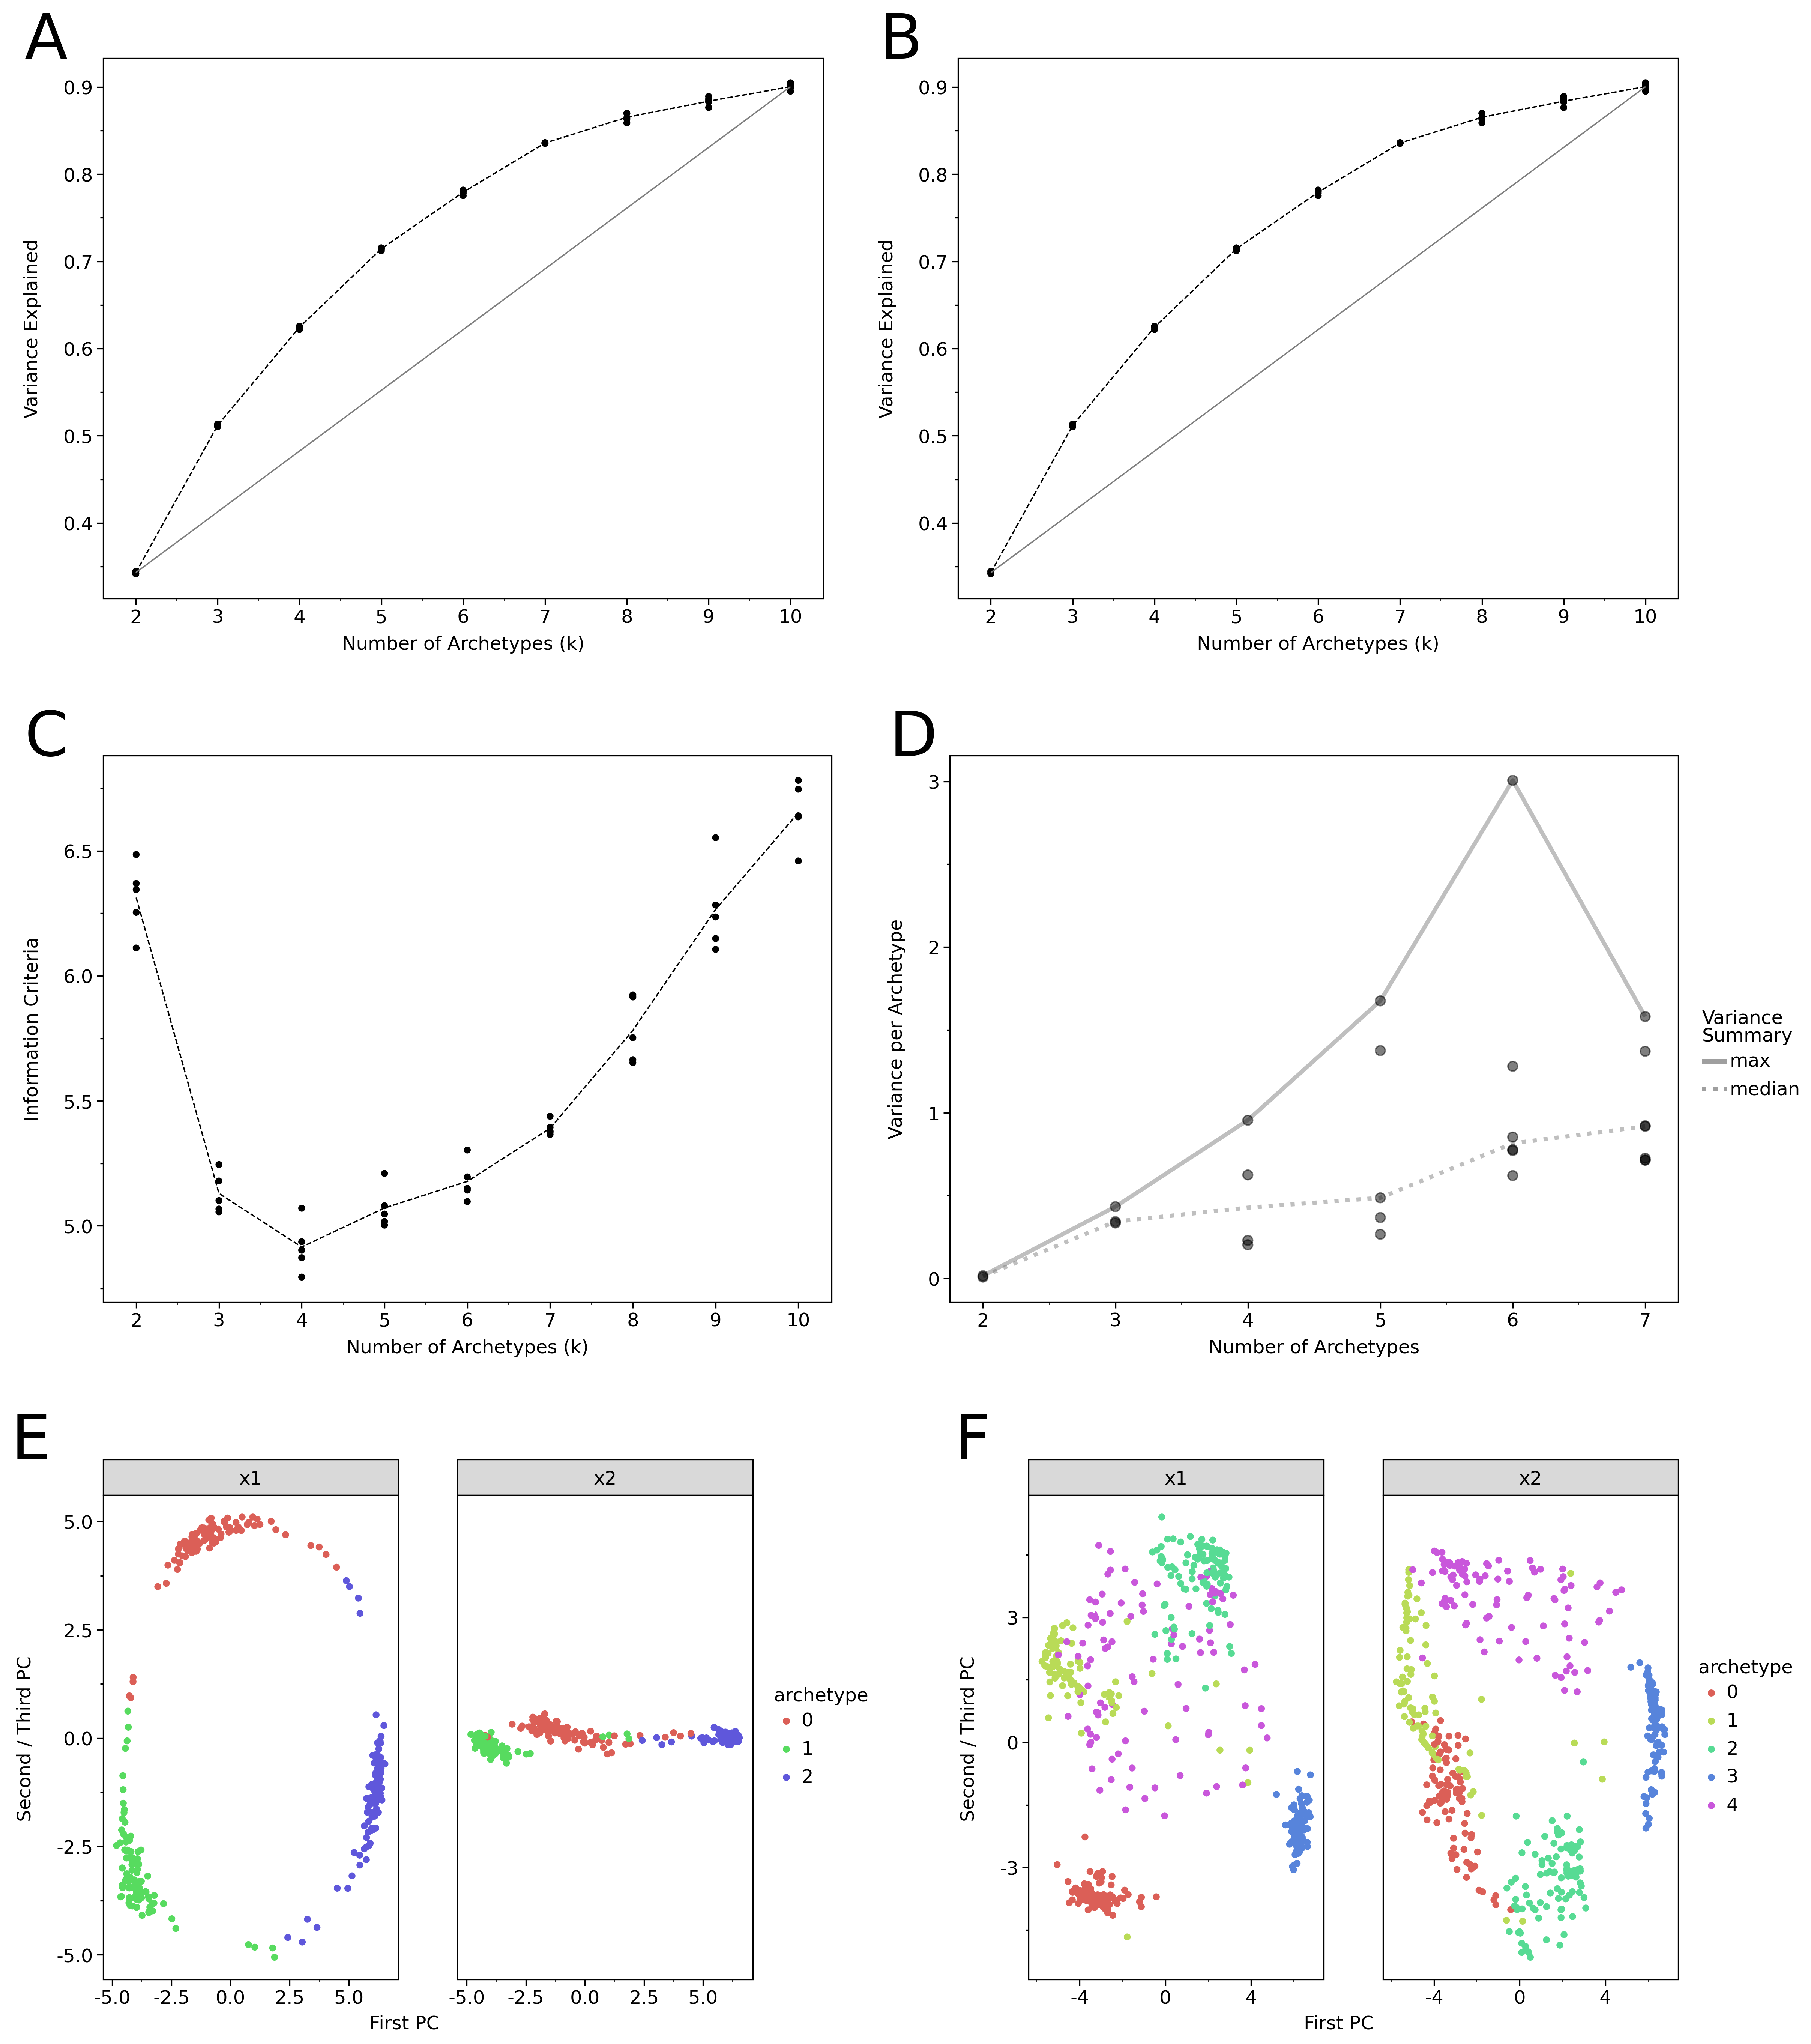

In [5]:
all_p = (p0|p1)/(p2|p5)/(p3|p4)
# all_p.align_xlabels()
# all_p.align_ylabels()
all_p